In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#checking the shape of data set
df.shape

(7043, 21)

There are 7043 rows and 21 columns in a dataset

In [4]:
#checking the datatype of each column 
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


Senior citizen and tenure are int type,monthly charges in float type and rest are in object type.

In [6]:
#checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values.

<AxesSubplot:>

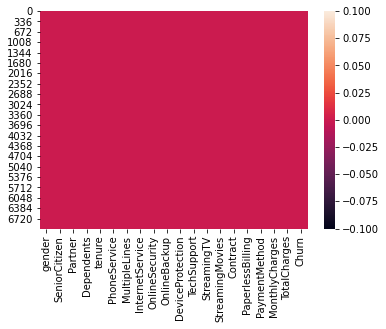

In [12]:
#checking null values using heat map
sn.heatmap(df.isnull())

In [7]:
#checking for unique values in each columns
df.apply(lambda x:len(x.unique()))

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
#droping customer_id
df.drop("customerID",axis=1,inplace=True)

In [9]:
#checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
#extracting object type
cat=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="object":
        cat.append(x)
cat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [11]:
#checking the value counts in all the object type variable
for col in cat:
    print(col)
    print(df[col].value_counts())
    print()

gender
Male      3555
Female    3488
Name: gender, dtype: int64

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    152

In [14]:
#extracting not object type
ncat=[]
for x in df.dtypes.index:
    if df.dtypes[x]!="object":
        ncat.append(x)
ncat

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [15]:
#checking the value counts in all the object type variable.
for col in ncat:
    print(col)
    print(df[col].value_counts())
    print()

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

MonthlyCharges
20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
87.65      1
35.30      1
114.85     1
56.50      1
97.25      1
Name: MonthlyCharges, Length: 1585, dtype: int64



# EDA

<AxesSubplot:xlabel='gender', ylabel='count'>

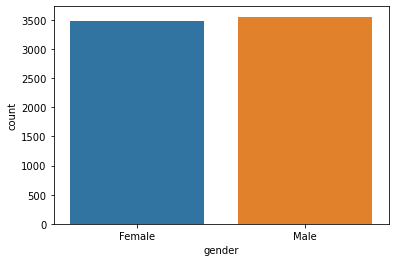

In [16]:
#gender
sn.countplot("gender", data=df)

Equal number of gender

<AxesSubplot:xlabel='Dependents', ylabel='count'>

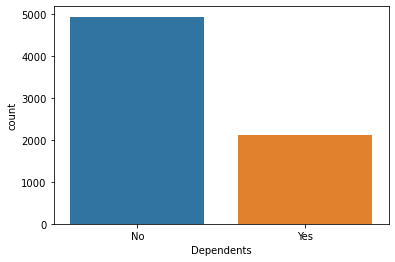

In [17]:
#Dependents
sn.countplot("Dependents", data=df)

More people has no dependents.

<AxesSubplot:xlabel='Partner', ylabel='count'>

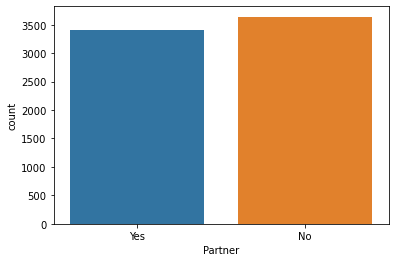

In [18]:
#Partner
sn.countplot("Partner", data=df)

the people with single and partner is nearly equal.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

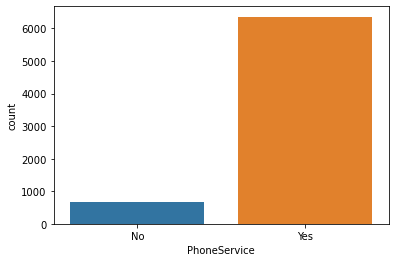

In [19]:
#PhoneService
sn.countplot("PhoneService", data=df)

Majority of people has phone services.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

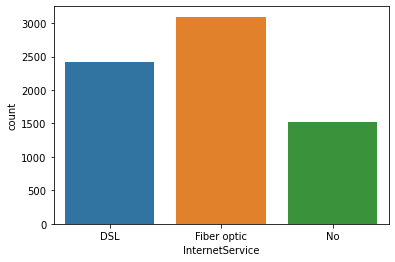

In [20]:
#InternetService
sn.countplot("InternetService", data=df)

lot of people has fiber optic internet services while some uses DSL.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

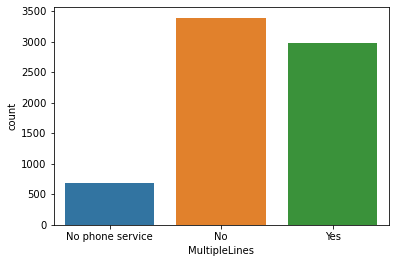

In [21]:
#MultipleLines
sn.countplot("MultipleLines", data=df)

Very few people has no phone services.More people dont have multiple lines

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

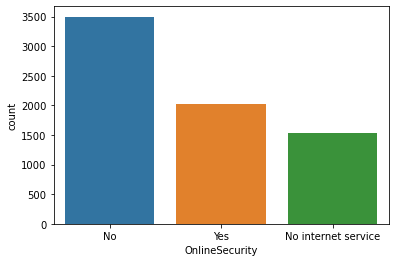

In [22]:
#OnlineSecurity
sn.countplot("OnlineSecurity", data=df)

lot of people dont have online security

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

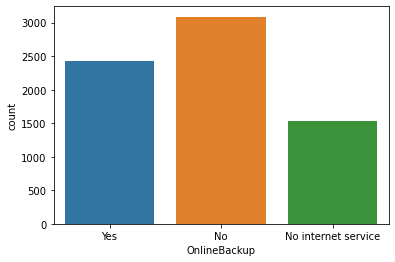

In [23]:
#OnlineBackup
sn.countplot("OnlineBackup", data=df)

 A lot of people is either with no Online backup or no internet services.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

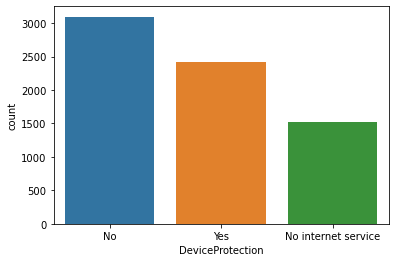

In [24]:
#DeviceProtection
sn.countplot("DeviceProtection", data=df)

Most of the people has no deviceprotection.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

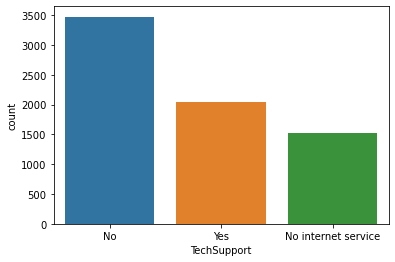

In [25]:
#TechSupport
sn.countplot("TechSupport", data=df)

lot of people dont have tech support.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

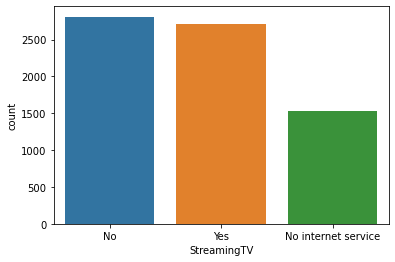

In [26]:
#StreamingTV
sn.countplot("StreamingTV", data=df)

There is good amount of people who has streaming tv.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

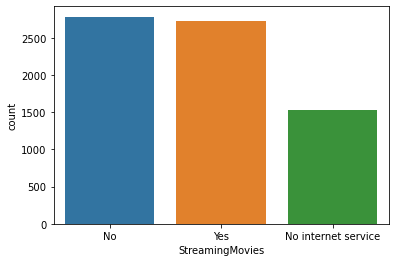

In [27]:
#StreamingMovies
sn.countplot("StreamingMovies", data=df)

There is good amount of people who has streaming movies.

<AxesSubplot:xlabel='Contract', ylabel='count'>

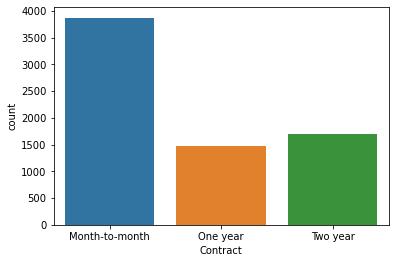

In [28]:
#Contract
sn.countplot("Contract", data=df)

Majority of people relay on month to month contract.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

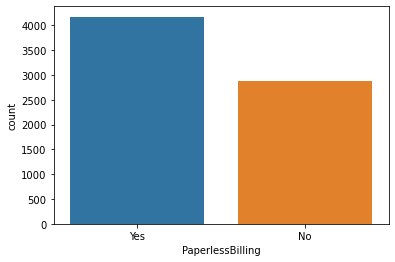

In [30]:
#PaperlessBilling
sn.countplot("PaperlessBilling", data=df)

Most people prefer paper less bills.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

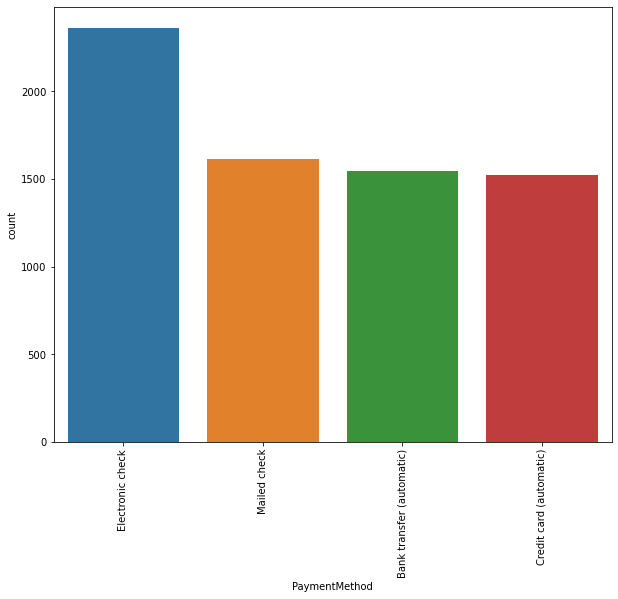

In [33]:
#PaymentMethod
plt.subplots(figsize=(10,8))
plt.xticks(rotation=90)
sn.countplot("PaymentMethod", data=df)

Electronic check is the most favored payment method.

<AxesSubplot:xlabel='Churn', ylabel='count'>

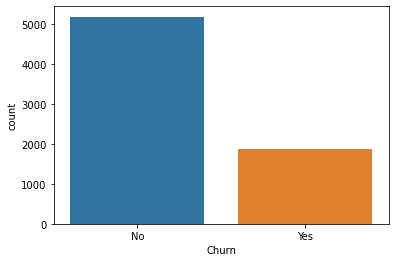

In [34]:
#Churn
sn.countplot("Churn", data=df)

1.Majority of customer churn resulted in no.
2.The dependent dataset is highly imbalanced.

In [35]:
#converting TotalCharges to float catogery
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [36]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [37]:
df.dropna(inplace=True)

In [38]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [41]:
#Creating a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(6,4))
    sn.set(style = "whitegrid")
    sn.distplot(data_frame[feature_name],kde=True)

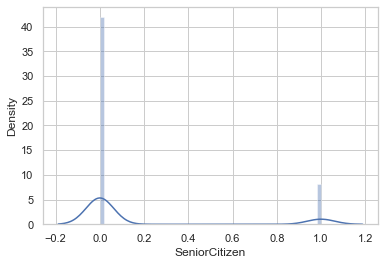

In [42]:
#SeniorCitizen
histogram(df,"SeniorCitizen")

Majority of people is not senior citizen.

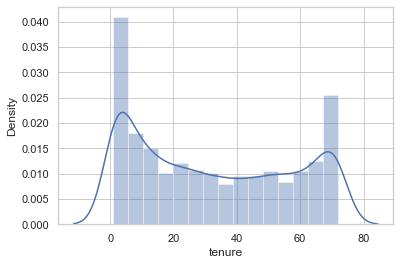

In [43]:
#tenure
histogram(df,"tenure")

The tenure goes from 0 to 70.

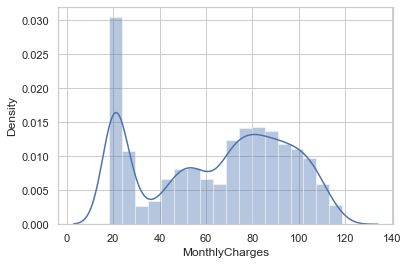

In [44]:
#MonthlyCharges
histogram(df,"MonthlyCharges")

The monthly charges lies from 20 to 120.

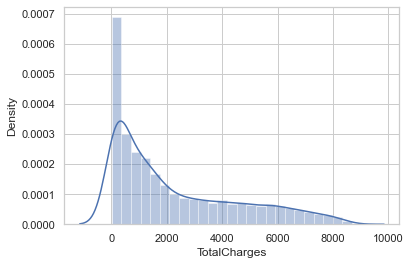

In [45]:
#TotalCharges
histogram(df,"TotalCharges")

The TotalCharges lies form 0 approx 8000.

# Bivariate Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

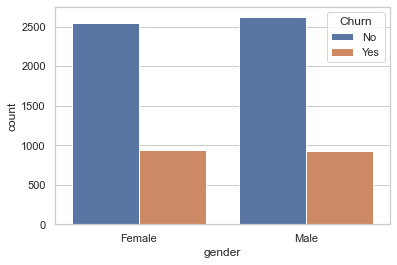

In [46]:
sn.countplot(x="gender",hue="Churn",data=df)

Gender is vey less correlated to Churn.

<AxesSubplot:xlabel='Partner', ylabel='count'>

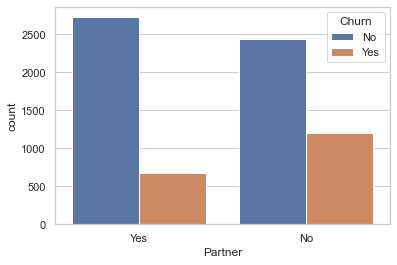

In [47]:
sn.countplot(x="Partner",hue="Churn",data=df)

The people who are single is more inclined toward churn.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

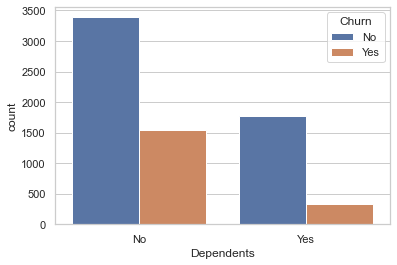

In [48]:
sn.countplot(x="Dependents",hue="Churn",data=df)

The people who are not dependent are more inclined towards churn.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

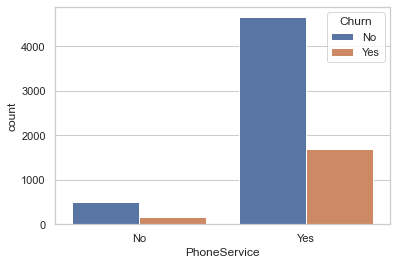

In [49]:
sn.countplot(x="PhoneService",hue="Churn",data=df)

people who have phone services are more inclined towards churn.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

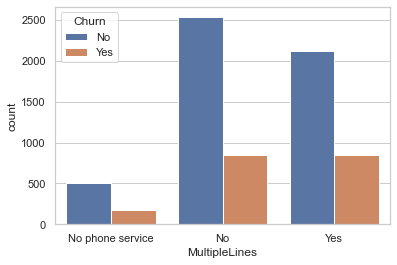

In [50]:
sn.countplot(x="MultipleLines",hue="Churn",data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

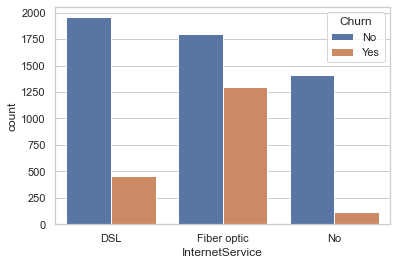

In [51]:
sn.countplot(x="InternetService",hue="Churn",data=df)

people who have fiberoptic internet servicies are more inclined towards churn.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

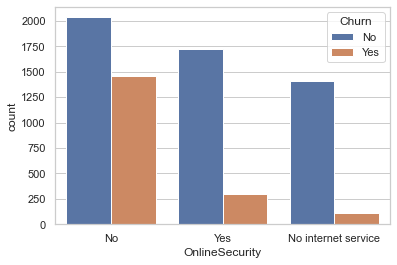

In [52]:
sn.countplot(x="OnlineSecurity",hue="Churn",data=df)

people who dont have online security are more inclined towards churn

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

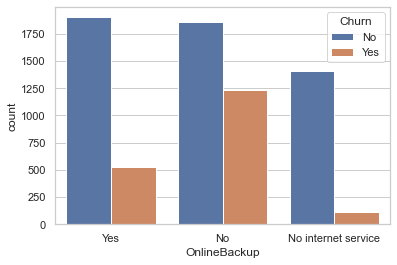

In [53]:
sn.countplot(x="OnlineBackup",hue="Churn",data=df)

people who dont have online backup are more inclined towards churn.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

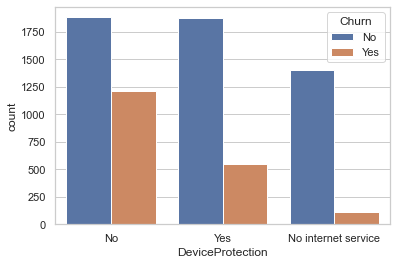

In [54]:
sn.countplot(x="DeviceProtection",hue="Churn",data=df)

people with no device protection are more inclined towards churn

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

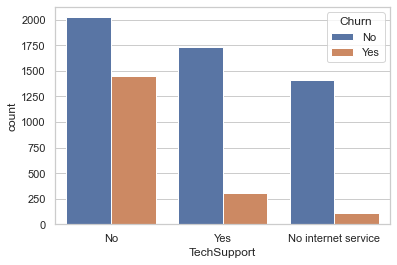

In [55]:
sn.countplot(x="TechSupport",hue="Churn",data=df)

people with no tech support are more inclined towards churn

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

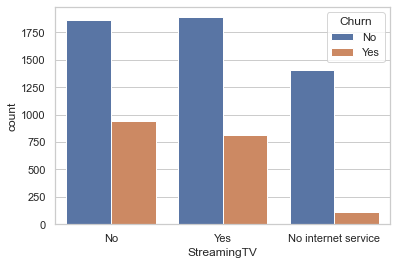

In [56]:
sn.countplot(x="StreamingTV",hue="Churn",data=df)

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

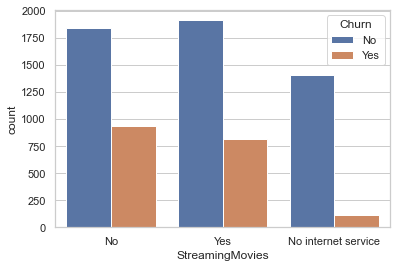

In [57]:
sn.countplot(x="StreamingMovies",hue="Churn",data=df)

<AxesSubplot:xlabel='Contract', ylabel='count'>

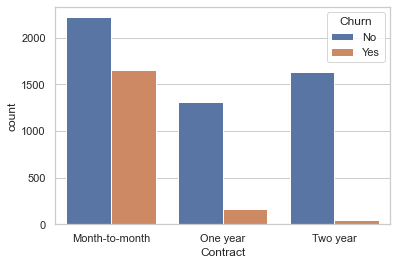

In [58]:
sn.countplot(x="Contract",hue="Churn",data=df)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

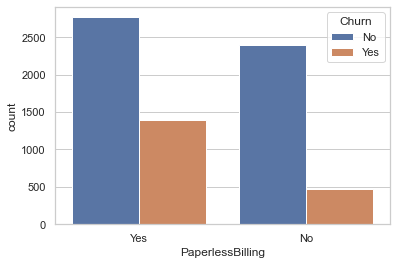

In [59]:
sn.countplot(x="PaperlessBilling",hue="Churn",data=df)

with paperlessbilling are more inclined to churn

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

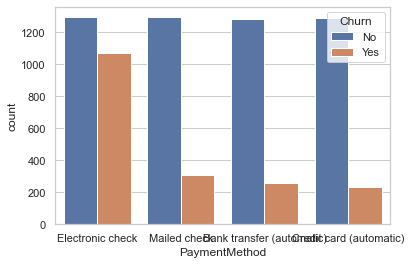

In [60]:
sn.countplot(x="PaymentMethod",hue="Churn",data=df)

people with electronic check payment method are highly inclined to churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

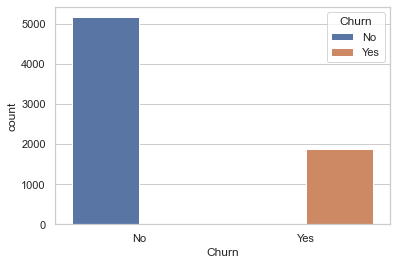

In [61]:
sn.countplot(x="Churn",hue="Churn",data=df)

# Using Label encoder to convert object type data into integer

In [62]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Dependents"]=encoder.fit_transform(df['Dependents'])
df["PhoneService"]=encoder.fit_transform(df['PhoneService'])
df["MultipleLines"]=encoder.fit_transform(df['MultipleLines'])
df["InternetService"]=encoder.fit_transform(df['InternetService'])
df["OnlineSecurity"]=encoder.fit_transform(df['OnlineSecurity'])
df["OnlineBackup"]=encoder.fit_transform(df['OnlineBackup'])
df["DeviceProtection"]=encoder.fit_transform(df['DeviceProtection'])
df["TechSupport"]=encoder.fit_transform(df['TechSupport'])
df["StreamingTV"]=encoder.fit_transform(df['StreamingTV'])
df["StreamingMovies"]=encoder.fit_transform(df['StreamingMovies'])
df["Contract"]=encoder.fit_transform(df['Contract'])
df["PaperlessBilling"]=encoder.fit_transform(df['PaperlessBilling'])
df["PaymentMethod"]=encoder.fit_transform(df['PaymentMethod'])
df["Churn"]=encoder.fit_transform(df['Churn'])
df["Partner"]=encoder.fit_transform(df['Partner'])
df["gender"]=encoder.fit_transform(df['gender'])

In [63]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


All the object type dataset are converted into int type 

# Checking Coorelation

<AxesSubplot:>

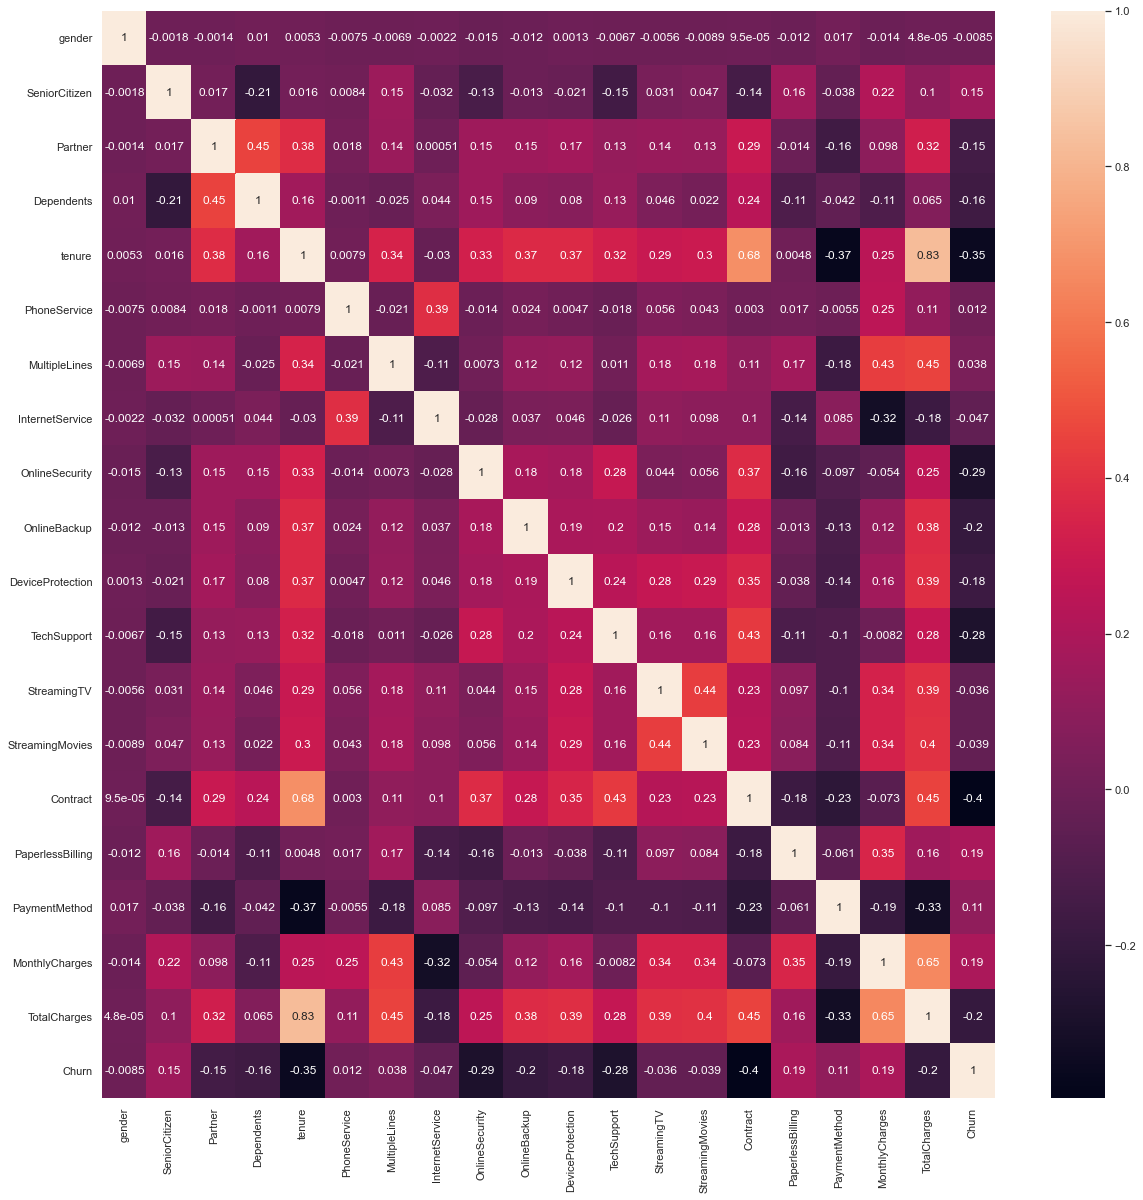

In [66]:
cor=df.corr()
plt.figure(figsize=(20,20))
sn.heatmap(cor, annot=True)

In [67]:
#since there are to many columns, sorting correlation with attrition in descending order
df.corr()["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

Monthly charges is highly positively correlated. 
Contract is highly negatively correlated.

# Checking Outliers

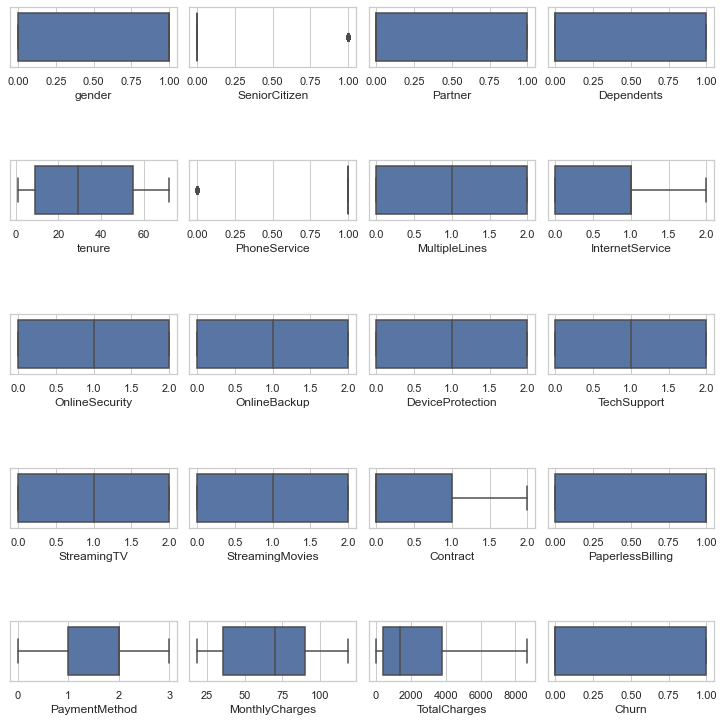

In [70]:
fig, ax=plt.subplots(ncols=4,nrows=5, figsize=(10,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sn.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

There is no outliers in a dataset.

# Skewness

In [71]:
#checking for skewness
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

# Splitting the data into input and target

In [77]:
x=df.drop('Churn',axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [78]:
y=df["Churn"]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [79]:
#Treating skewness with power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
#checking for skewness
df_new.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure             -0.242816
PhoneService       -2.729727
MultipleLines       0.033718
InternetService    -0.072388
OnlineSecurity      0.150928
OnlineBackup       -0.000378
DeviceProtection    0.002098
TechSupport         0.141282
StreamingTV        -0.096494
StreamingMovies    -0.105966
Contract            0.304841
PaperlessBilling   -0.377503
PaymentMethod      -0.207192
MonthlyCharges     -0.259485
TotalCharges       -0.144643
dtype: float64

In [80]:
x=df_new

# Build Model

In [81]:
#importing libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [84]:
#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4922, 19), (2110, 19), (4922,), (2110,))

In [85]:
# function to train, test and performance check 
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""The classification report is:
    """,classification_report(y_test, predict))
       
    print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
    print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))
    print("cross_val_score: ",cross_val_score(model,x,y,cv=5).mean())

In [86]:
#RandomForestClassifier
model(RandomForestClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.82      0.89      0.86      1545
           1       0.62      0.48      0.54       565

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110

The accuracy score is:  0.7824644549763033
The confusion matrix is:
    
     [[1381  164]
 [ 295  270]]
cross_val_score:  0.7903847961978363


In [87]:
#DecisionTreeClassifier
model(DecisionTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.82      0.81      0.81      1545
           1       0.50      0.52      0.51       565

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110

The accuracy score is:  0.7303317535545024
The confusion matrix is:
    
     [[1246  299]
 [ 270  295]]
cross_val_score:  0.7261064116523661


In [89]:
#KNeighborsClassifier
model(KNeighborsClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.82      0.84      0.83      1545
           1       0.54      0.50      0.52       565

    accuracy                           0.75      2110
   macro avg       0.68      0.67      0.68      2110
weighted avg       0.75      0.75      0.75      2110

The accuracy score is:  0.7502369668246446
The confusion matrix is:
    
     [[1298  247]
 [ 280  285]]
cross_val_score:  0.76322462064803


In [90]:
#Naive Bayes
model(GaussianNB)

The classification report is:
                   precision    recall  f1-score   support

           0       0.88      0.76      0.82      1545
           1       0.53      0.72      0.61       565

    accuracy                           0.75      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.75      0.76      2110

The accuracy score is:  0.7511848341232228
The confusion matrix is:
    
     [[1180  365]
 [ 160  405]]
cross_val_score:  0.7576781809303411


# Random forest classifier is our best model and it has highest accuracy score.

# Hyper parameter Tuning

In [91]:
#creating parameter
parameter={"criterion":["gini","entropy"],
           "max_depth":[1,2,3,4,5,6,7,8,9,"None"],
           "max_features" :["auto","sqrt","log2"],
           "n_estimators":[50,100]
          }

In [92]:
#using GridSearchCV for Hyper parameter tunning
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 'None'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100]})

In [93]:
#checking best parameters
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 50}

In [97]:
best_model=RandomForestClassifier(criterion='entropy',max_depth=9,max_features='auto',n_estimators=50)
best_model.fit(x_train,y_train)
predict=best_model.predict(x_test)
print("""The classification report is:
    """,classification_report(y_test, predict))
       
print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))

The classification report is:
                   precision    recall  f1-score   support

           0       0.83      0.90      0.87      1545
           1       0.66      0.50      0.57       565

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

The accuracy score is:  0.7962085308056872
The confusion matrix is:
    
     [[1397  148]
 [ 282  283]]


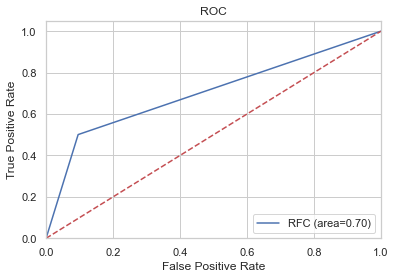

In [98]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rfc_roc_auc=roc_auc_score(y_test, best_model.predict(x_test))
fpr, tpr,thresholds=roc_curve(y_test,best_model.predict(x_test))
plt.figure
plt.plot(fpr,tpr, label="RFC (area=%0.2f)" % rfc_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.savefig("RFC_ROC")
plt.show()

In [99]:
#70 percent of the data is under the curve

# Saving the Model

In [100]:
import joblib
joblib.dump(best_model,"Customer_churn-Data.pkl")

['Customer_churn-Data.pkl']